In [1]:
import numpy as np
import matplotlib.pyplot as plt

import casadi_trajectory_optimization.dubins_dynamics as dubins_dynamics
from casadi_trajectory_optimization.dubins_dynamics import DubinsDynamics
from casadi_trajectory_optimization.multi_agent_optimization import MultiAgentOptimization

In [2]:
dubins = DubinsDynamics(control=dubins_dynamics.CONTROL_LIN_ACC_ANG_VEL)
deg2rad = np.pi/180
x_bounds = np.array([
    [-10., 10.],
    [-10., 10.],
    [-1., 1.],
    [-np.inf, np.inf]
])
u_bounds = np.array([
    [-5, 5.],
    [-45*deg2rad, 45*deg2rad]
])

# Single Agent with Obstacles

In [3]:
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4]])
xf = np.array([[5.0, 5.0, 0.0, np.pi/4]])
planner = MultiAgentOptimization(dubins, num_timesteps=100)
planner.add_obstacle(np.array([1, 2]), .5)
planner.add_obstacle(np.array([3, 2]), .5)
planner.add_obstacle(np.array([4, 4]), .5)
planner.setup_min_time_opt(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)
planner.opti.subject_to(planner.tf > 1.0)
x, u, tf = planner.solve_opt()

time: 7.707947101439352


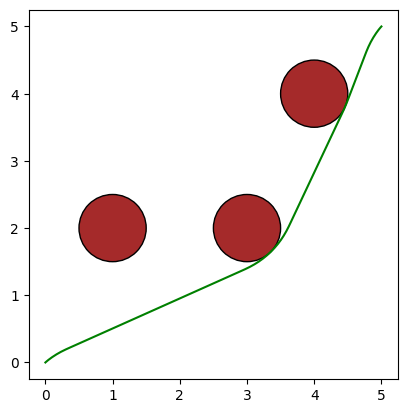

In [4]:
print(f'time: {tf}')
fig, ax = planner.draw_path()

# Multiple Agents

In [5]:
planner = MultiAgentOptimization(dubins, num_agents=2, num_timesteps=100)
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4],
               [5.0, 5.0, 0.0, 5*np.pi/4]])
xf = np.array([[5.0, 5.0, 0.0, np.pi/4],
              [0.0, 0.0, 0.0, 5*np.pi/4]])


planner.setup_min_time_opt(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)
x, u, tf = planner.solve_opt()

final time: 7.350236629714803


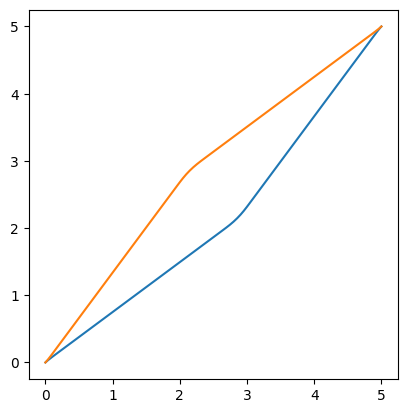

In [6]:
fig, ax = plt.subplots()
for i in range(planner.M):
    ax.plot(x[i][0,:], x[i][1,:])
ax.set_aspect('equal')
print(f'final time: {tf}')

In [7]:
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4],
               [5.0, 5.0, 0.0, 5*np.pi/4],
               [2, 0, 0, 0]])
xf = np.array([[5.0, 5.0, 0.0, np.pi/4],
              [0.0, 0.0, 0.0, 5*np.pi/4],
              [2, 5, 0, 0]])
planner = MultiAgentOptimization(dubins, num_agents=3, num_timesteps=100)
planner.add_obstacle(np.array([2, 2]), .5)
planner.setup_min_time_opt(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)
planner.opti.subject_to(planner.tf > 1.0) # planner can get stuck without this
x, u, tf = planner.solve_opt()

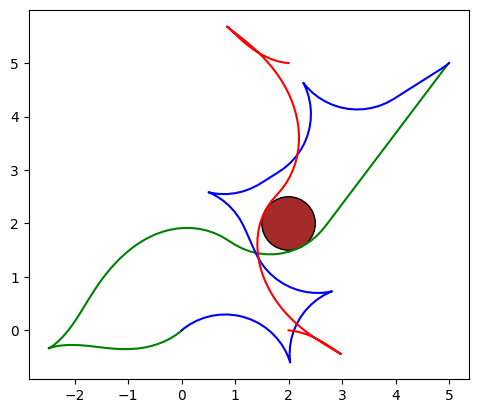

In [8]:
fig, ax = planner.draw_path()

#### Harder problem

In [9]:
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4],
               [5.0, 5.0, 0.0, 5*np.pi/4],
               [2, 0, 0, 0]])
xf = np.array([[5.0, 5.0, 0.0, np.pi/4],
              [0.0, 0.0, 0.0, 5*np.pi/4],
              [2, 5, 0, 0]])
planner = MultiAgentOptimization(dubins, num_agents=3, num_timesteps=100)
planner.add_obstacle(np.array([2, 2]), .5)
planner.add_obstacle(np.array([3, 4]), .5)
planner.add_obstacle(np.array([1, 1]), .2)
planner.add_obstacle(np.array([1, 4]), .2)
planner.add_obstacle(np.array([3, 2]), .2)
planner.setup_min_time_opt(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)
planner.opti.subject_to(planner.tf > 1.0) # planner can get stuck without this
x, u, tf = planner.solve_opt()

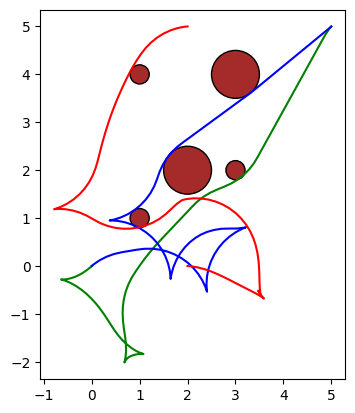

In [10]:
fig, ax = planner.draw_path()
